In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('variant_7.csv')
data.head()

,couple_1_1,couple_1_2,couple_2_1,couple_2_2,couple_3_1,couple_3_2,couple_4_1,couple_4_2,couple_5_1,couple_5_2,couple_6_1,couple_6_2
0,190.026914,-333.337537,2125.551600,169.034821,445.878401,375.027237,-1658.136653,-22.604441,1403.985305,312.964270,-1283.761763,-1010.570707
1,29.901053,-145.026023,1230.641174,2161.502726,714.432568,599.659614,1195.727193,294.339920,424.069070,1210.800885,-1233.873045,394.815275
2,-88.136291,57.102677,907.040911,1180.186410,-114.297965,-253.821708,-2571.263492,32.395543,877.841543,734.210096,-566.638727,423.968549
3,222.939976,-405.641365,1219.197469,337.349449,741.441531,108.156538,-107.332241,1260.752669,1499.308782,460.735949,-1495.199577,27.203556
4,706.549888,-141.318705,802.499493,1871.515833,510.380012,109.295804,-1174.910228,1941.082875,1436.061078,480.806013,-746.624814,687.414947


In [4]:
# Задание 1

normality = {}
alpha = 0.05

for column_title in data.columns:
    print(column_title)
    normality[column_title] = stats.shapiro(data[column_title])
#     Тест Шапиро-Уилка на нормальность распределения
    print(stats.shapiro(data[column_title]))
    if normality[column_title].pvalue >= alpha:
        print('Нормальное распределение\n')
    else:
        print('Распределение не является нормальным\n')

couple_1_1
ShapiroResult(statistic=0.9887683987617493, pvalue=0.9132680892944336)
Нормальное распределение

couple_1_2
ShapiroResult(statistic=0.9544981122016907, pvalue=0.05235398933291435)
Нормальное распределение

couple_2_1
ShapiroResult(statistic=0.9919390082359314, pvalue=0.9807055592536926)
Нормальное распределение

couple_2_2
ShapiroResult(statistic=0.9274691343307495, pvalue=0.004437875468283892)
Распределение не является нормальным

couple_3_1
ShapiroResult(statistic=0.9759900569915771, pvalue=0.39778435230255127)
Нормальное распределение

couple_3_2
ShapiroResult(statistic=0.9756810069084167, pvalue=0.3873019814491272)
Нормальное распределение

couple_4_1
ShapiroResult(statistic=0.9851645231246948, pvalue=0.7786571979522705)
Нормальное распределение

couple_4_2
ShapiroResult(statistic=0.936194658279419, pvalue=0.009553135372698307)
Распределение не является нормальным

couple_5_1
ShapiroResult(statistic=0.9822551608085632, pvalue=0.6501641869544983)
Нормальное распределение


In [78]:
title1 = ''
title2 = ''
counter = 0
flag = False
var_dict_norm = {}
alpha = 0.05

for column_title in data.columns:
    counter += 1
        
    if title1 == '':
        title1 = column_title
        print()
        continue
        
    if flag:
        flag = False
        var_dict_norm[title1] = False
        title1 = ''
        continue

    print(title1, normality[title1].pvalue)
    print(column_title, normality[column_title].pvalue)
    if normality[title1].pvalue < alpha or normality[column_title].pvalue < alpha:
        if counter % 2 != 0:
            var_dict_norm[title1] = False
            title1 = ''
            flag = True
            continue
        else:
            var_dict_norm[title1] = False
            var_dict_norm[column_title] = False
            title1 = ''
            title2 = ''
            continue
        
    title2 = column_title
    
    f_test = stats.fligner(data[title1], data[title2])
#     F-тест проверки равенства дисперсий двух выборок
    print(stats.fligner(data[title1], data[title2]))
    if f_test.pvalue > alpha:
        print('Нулевая гипотеза принимается за истину (выборочные дисперсии равны)\n')
        var_dict_norm[title1] = True
        var_dict_norm[title2] = True
    else:
        print('Нулевая гипотеза отклоняется (выборочные дисперсии не равны)\n')
        var_dict_norm[title1] = False
        var_dict_norm[title2] = False
        
    title1 = ''
    title2 = ''


couple_1_1 0.9132680892944336
couple_1_2 0.05235398933291435
FlignerResult(statistic=15.186928610179011, pvalue=9.737513626305033e-05)
Нулевая гипотеза отклоняется (дисперсии не равны)


couple_2_1 0.9807055592536926
couple_2_2 0.004437875468283892

couple_3_1 0.39778435230255127
couple_3_2 0.3873019814491272
FlignerResult(statistic=0.8649312252136572, pvalue=0.3523623925933945)
Нулевая гипотеза принимается за истину (дисперсии равны)


couple_4_1 0.7786571979522705
couple_4_2 0.009553135372698307

couple_5_1 0.6501641869544983
couple_5_2 0.3673444092273712
FlignerResult(statistic=0.5196653786285281, pvalue=0.4709844568435241)
Нулевая гипотеза принимается за истину (дисперсии равны)


couple_6_1 0.5513071417808533
couple_6_2 0.21401597559452057
FlignerResult(statistic=12.962806775050815, pvalue=0.00031774046542514477)
Нулевая гипотеза отклоняется (дисперсии не равны)



In [83]:
title1 = ''
title2 = ''
counter = 0
flag = False
alpha = 0.05

for column_title in data.columns:
    counter += 1
        
    if title1 == '':
        title1 = column_title
        continue
        
    if flag:
        flag = False
        title1 = ''
        continue

    print(title1, normality[title1].pvalue, var_dict_norm[title1])
    print(column_title, normality[column_title].pvalue, var_dict_norm[column_title])
    if normality[title1].pvalue < alpha or normality[column_title].pvalue < alpha or \
    var_dict_norm[title1] == False or var_dict_norm[column_title] == False:
        if counter % 2 != 0:
            title1 = ''
            flag = True
            print()
            continue
        else:
            title1 = ''
            title2 = ''
            print()
            continue
        
    title2 = column_title
    
#     T-тест проверки равенства средних значений в двух выборках
    t_test = stats.ttest_ind(data[title1], data[title2])
    print(stats.ttest_ind(data[title1], data[title2]))
    print('Мат ожидание:', data[title1].mean(), data[title2].mean())
    if t_test.pvalue > alpha:
        print('Нулевая гипотеза принимается за истину (выборочные средние равны)\n')
    else:
        print('Нулевая гипотеза отклоняется (выборочные средние не равны)\n')
        
    title1 = ''
    title2 = ''

couple_1_1 0.9132680892944336 False
couple_1_2 0.05235398933291435 False

couple_2_1 0.9807055592536926 False
couple_2_2 0.004437875468283892 False

couple_3_1 0.39778435230255127 True
couple_3_2 0.3873019814491272 True
Ttest_indResult(statistic=0.007569957677410845, pvalue=0.9939754939073824)
Мат ожидание: 141.28379723800185 140.82334794357502
Нулевая гипотеза принимается за истину (выборочные средние равны)

couple_4_1 0.7786571979522705 False
couple_4_2 0.009553135372698307 False

couple_5_1 0.6501641869544983 True
couple_5_2 0.3673444092273712 True
Ttest_indResult(statistic=2.608072035418366, pvalue=0.010529261113516295)
Мат ожидание: 948.2097921335422 724.4926841279088
Нулевая гипотеза отклоняется (выборочные средние не равны)

couple_6_1 0.5513071417808533 False
couple_6_2 0.21401597559452057 False



In [7]:
title1 = ''
title2 = ''
counter = 0
flag = False
var_dict_not_normal = {}
alpha = 0.05

for column_title in data.columns:
    counter += 1
        
    if title1 == '':
        title1 = column_title
        print()
        continue
        
    if flag:
        flag = False
        var_dict_not_normal[title1] = False
        title1 = ''
        continue

    print(title1, normality[title1].pvalue)
    print(column_title, normality[column_title].pvalue)
    if normality[title1].pvalue > alpha and normality[column_title].pvalue > alpha:
        if counter % 2 != 0:
            var_dict_not_normal[title1] = False
            title1 = ''
            flag = True
            continue
        else:
            var_dict_not_normal[title1] = False
            var_dict_not_normal[column_title] = False
            title1 = ''
            title2 = ''
            continue
        
    title2 = column_title
    
    bartlett_test = stats.fligner(data[title1], data[title2])
#     критерий Флигнера-Килина для проверки равенства дисперсий двух выборок, не являющихся нормальными
    print(stats.fligner(data[title1], data[title2]))
    if bartlett_test.pvalue > alpha:
        print('Нулевая гипотеза принимается за истину (выборочные дисперсии равны)\n')
        var_dict_not_normal[title1] = True
        var_dict_not_normal[title2] = True
    else:
        print('Нулевая гипотеза отклоняется (выборочные дисперсии не равны)\n')
        var_dict_not_normal[title1] = False
        var_dict_not_normal[title2] = False
        
    title1 = ''
    title2 = ''


couple_1_1 0.9132680892944336
couple_1_2 0.05235398933291435

couple_2_1 0.9807055592536926
couple_2_2 0.004437875468283892
FlignerResult(statistic=3.5101386299133677, pvalue=0.060994351626561)
Нулевая гипотеза принимается за истину (выборочные дисперсии равны)


couple_3_1 0.39778435230255127
couple_3_2 0.3873019814491272

couple_4_1 0.7786571979522705
couple_4_2 0.009553135372698307
FlignerResult(statistic=0.4997281097844214, pvalue=0.4796196127468946)
Нулевая гипотеза принимается за истину (выборочные дисперсии равны)


couple_5_1 0.6501641869544983
couple_5_2 0.3673444092273712

couple_6_1 0.5513071417808533
couple_6_2 0.21401597559452057


In [8]:
title1 = ''
title2 = ''
counter = 0
flag = False
alpha = 0.05

for column_title in data.columns:
    counter += 1
        
    if title1 == '':
        title1 = column_title
        continue
        
    if flag:
        flag = False
        title1 = ''
        continue

    print(title1, normality[title1].pvalue, var_dict_not_normal[title1])
    print(column_title, normality[column_title].pvalue, var_dict_not_normal[column_title])
    if (normality[title1].pvalue > alpha and normality[column_title].pvalue > alpha) or \
    var_dict_not_normal[title1] == False or var_dict_not_normal[column_title] == False:
        if counter % 2 != 0:
            title1 = ''
            flag = True
            print()
            continue
        else:
            title1 = ''
            title2 = ''
            print()
            continue
        
    title2 = column_title
    
#     Критерий Манна – Уитни проверки равенства средних значений в двух выборках, не являющихся нормальными
    mw_test = stats.mannwhitneyu(data[title1], data[title2])
    print(stats.mannwhitneyu(data[title1], data[title2]))
    print('Мат ожидание:', data[title1].mean(), data[title2].mean())
    if mw_test.pvalue > alpha:
        print('Нулевая гипотеза принимается за истину (выборочные средние равны)\n')
    else:
        print('Нулевая гипотеза отклоняется (выборочные средние не равны)\n')
        
    title1 = ''
    title2 = ''

couple_1_1 0.9132680892944336 False
couple_1_2 0.05235398933291435 False

couple_2_1 0.9807055592536926 True
couple_2_2 0.004437875468283892 True
MannwhitneyuResult(statistic=1135.0, pvalue=0.214955962809604)
Мат ожидание: 1012.2053350267921 841.055214940403
Нулевая гипотеза принимается за истину (выборочные средние равны)

couple_3_1 0.39778435230255127 False
couple_3_2 0.3873019814491272 False

couple_4_1 0.7786571979522705 True
couple_4_2 0.009553135372698307 True
MannwhitneyuResult(statistic=630.0, pvalue=9.742083704312061e-06)
Мат ожидание: -82.05162256107303 872.5068305579463
Нулевая гипотеза отклоняется (выборочные средние не равны)

couple_5_1 0.6501641869544983 False
couple_5_2 0.3673444092273712 False

couple_6_1 0.5513071417808533 False
couple_6_2 0.21401597559452057 False



In [124]:
# Задание 2

alpha = 0.05

norm = []
ne_norm = []

for column_title in data.columns:
    if normality[column_title].pvalue >= alpha:
        print(column_title, normality[column_title].pvalue, 'normal')
        norm.append(data[column_title])
#         norm[column_title] = data[column_title]
    else:
        print(column_title, normality[column_title].pvalue, 'not normal')
        ne_norm.append(data[column_title])
#         ne_norm[column_title] = data[column_title]
    
print(len(norm), len(ne_norm), '\n')

bartlett_test = stats.bartlett(*norm)
levene_test = stats.levene(*ne_norm)
print(bartlett_test)
if bartlett_test.pvalue >= alpha:
    print('Нулевая гипотеза принимается за истину (выборочные дисперсии равны)\n')
else:
    print('Нулевая гипотеза отклоняется (выборочные дисперсии не равны)\n')
    
print(levene_test)
if levene_test.pvalue >= alpha:
    print('Нулевая гипотеза принимается за истину (выборочные дисперсии равны)\n')
else:
    print('Нулевая гипотеза отклоняется (выборочные дисперсии не равны)\n')

couple_1_1 0.9132680892944336 normal
couple_1_2 0.05235398933291435 normal
couple_2_1 0.9807055592536926 normal
couple_2_2 0.004437875468283892 not normal
couple_3_1 0.39778435230255127 normal
couple_3_2 0.3873019814491272 normal
couple_4_1 0.7786571979522705 normal
couple_4_2 0.009553135372698307 not normal
couple_5_1 0.6501641869544983 normal
couple_5_2 0.3673444092273712 normal
couple_6_1 0.5513071417808533 normal
couple_6_2 0.21401597559452057 normal
10 2 

BartlettResult(statistic=182.2161466359864, pvalue=1.745382176872909e-34)
Нулевая гипотеза отклоняется (выборочные дисперсии не равны)

LeveneResult(statistic=0.14028236078741793, pvalue=0.7088097116400371)
Нулевая гипотеза принимается за истину (выборочные дисперсии равны)



ShapiroResult(statistic=0.979262113571167, pvalue=0.5212775468826294)
Нормальное распределение

ShapiroResult(statistic=0.9806897640228271, pvalue=0.5813996195793152)
Нормальное распределение

ShapiroResult(statistic=0.9768378734588623, pvalue=0.42762765288352966)
Нормальное распределение

ShapiroResult(statistic=0.9803507328033447, pvalue=0.5668469071388245)
Нормальное распределение

ShapiroResult(statistic=0.9857364296913147, pvalue=0.8027538657188416)
Нормальное распределение

ShapiroResult(statistic=0.9795691967010498, pvalue=0.5339388847351074)
Нормальное распределение

ShapiroResult(statistic=0.9882367253303528, pvalue=0.8966190814971924)
Нормальное распределение

ShapiroResult(statistic=0.9871382117271423, pvalue=0.8581672310829163)
Нормальное распределение

ShapiroResult(statistic=0.9643275737762451, pvalue=0.13492397964000702)
Нормальное распределение

ShapiroResult(statistic=0.9856910109519958, pvalue=0.800866425037384)
Нормальное распределение

ShapiroResult(statistic=0.9844

ShapiroResult(statistic=0.801440417766571, pvalue=9.464910704082286e-07)
Распределение не является нормальным

ShapiroResult(statistic=0.8969045281410217, pvalue=0.00038032958400435746)
Распределение не является нормальным

ShapiroResult(statistic=0.7204909324645996, pvalue=1.9672180329166622e-08)
Распределение не является нормальным

ShapiroResult(statistic=0.9249050617218018, pvalue=0.0035630606580525637)
Распределение не является нормальным

ShapiroResult(statistic=0.8338179588317871, pvalue=5.801798579341266e-06)
Распределение не является нормальным

ShapiroResult(statistic=0.8895044326782227, pvalue=0.0002202402101829648)
Распределение не является нормальным

ShapiroResult(statistic=0.9057429432868958, pvalue=0.0007476863684132695)
Распределение не является нормальным



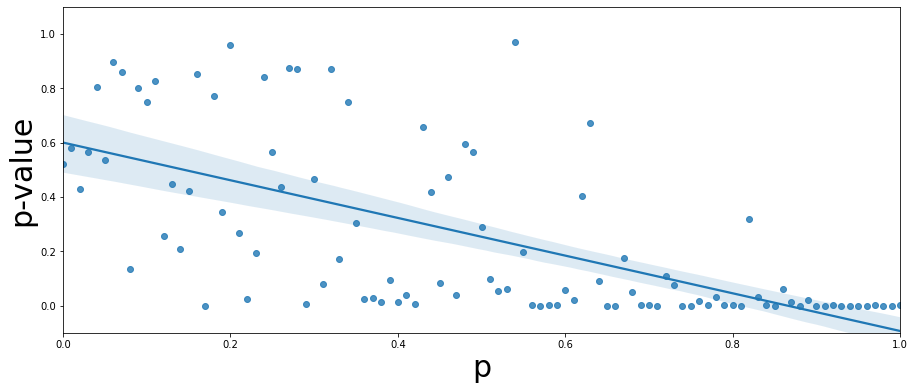

In [52]:
# Задание 3

array = []
alpha = 0.05

for p in np.arange(0, 1.01, 0.01):
    sample = []
    
    list_of_p = np.random.choice(2, 50, p=[p, 1 - p])
    
    for i in list_of_p:
        if i == 1:
            sample.append(np.random.normal(500, 100))
        else:
            sample.append(stats.weibull_min.rvs(1 + np.random.choice(2), 500, 100))

    shapiro_test = stats.shapiro(sample)
    print(shapiro_test)

    if shapiro_test.pvalue > alpha:
        array.append(shapiro_test.pvalue)
        print('Нормальное распределение\n')
    else:
        array.append(shapiro_test.pvalue)
        print('Распределение не является нормальным\n')

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.set(xlim = (0, 1), ylim=(-0.1, 1.1))
ax = sns.regplot(y=array, x=[i for i in np.arange(0, 1.01, 0.01)])
# ax = sns.regplot(y=array, x=[i for i in np.arange(1, -0.01, -0.01)])
ax.set_xlabel("p", fontsize=30)
ax.set_ylabel("p-value", fontsize=30)
plt.show()